# Unsupervised Analysis of Days of Week
Treating crossinhs each day as features to learn about the relationships between various days.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from jupyterworkflow.data import get_fremont_data

## Get Data

In [2]:
data = get_fremont_data()

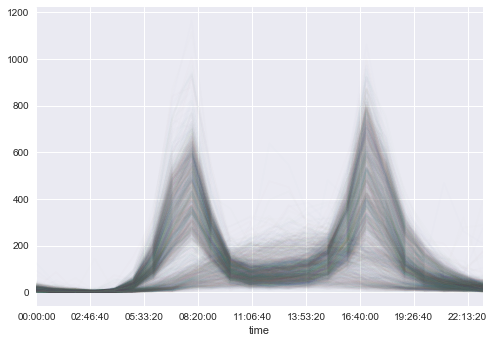

In [3]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

## Principal Component Analysis

In [4]:
X = pivoted.fillna(0).T.values
X.shape

(2067, 24)

In [5]:
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [6]:
X2.shape

(2067, 2)

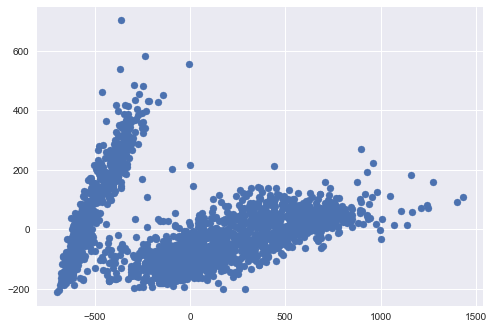

In [7]:
plt.scatter(X2[:, 0], X2[:, 1])

## Unsupervised Clustering

In [8]:
from sklearn.mixture import GaussianMixture
qmm = GaussianMixture(2).fit(X)
labels = qmm.predict(X)
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

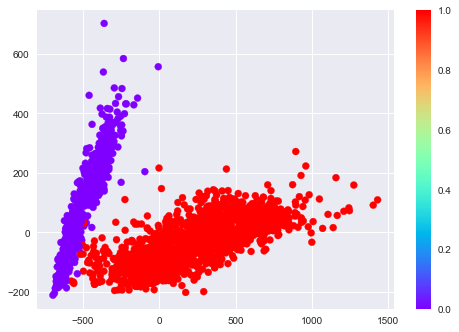

In [9]:
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='rainbow')
plt.colorbar()

Text(0.5,1,'Purple Cluster')

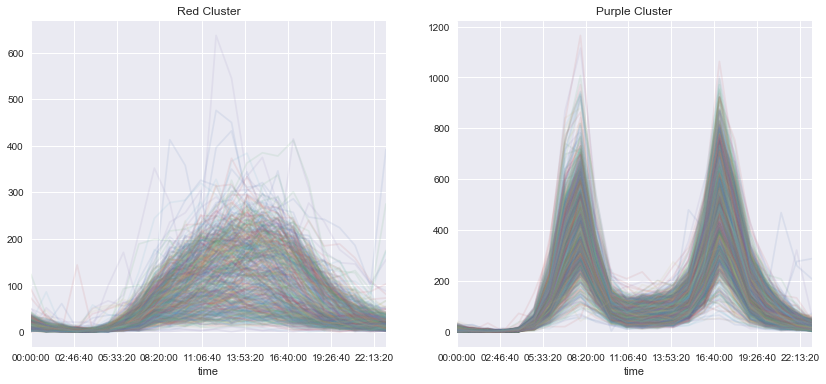

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels==0].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels==1].T.plot(legend=False, alpha=0.1, ax=ax[1])

ax[0].set_title('Red Cluster')
ax[1].set_title('Purple Cluster')

## Comparing with Day of Week

In [11]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
dayofweek

Int64Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
            ...
            1, 2, 3, 4, 5, 6, 0, 1, 2, 3],
           dtype='int64', length=2067)

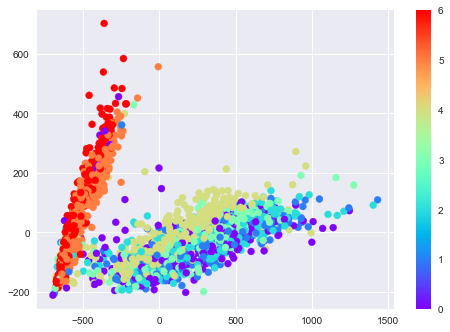

In [12]:
plt.scatter(X2[:,0], X2[:,1], c=dayofweek, cmap='rainbow')
plt.colorbar()

## Analyzing Outliers
The following points are weekdays with a holiday-like pattern

In [13]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek <5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2018-05-17', '2018-05-18', '2018-05-21', '2018-05-22',
               '2018-05-23', '2018-05-24', '2018-05-25', '2018-05-29',
               '2018-05-30', '2018-05-31'],
              dtype='datetime64[ns]', length=1427, freq=None)

Whats's up with Feb , 2017? [Snow Strorm] (https://www.seattletimes.com/seattle-news/weather/weather-service-predicts-3-to-6-inches-of-snow-in-seattle-area/)